In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
import random
from math import sin, cos, sqrt, atan2, radians
from ease_grid import EASE2_grid
grid_size = 36000
egrid = EASE2_grid(grid_size)
import time
from impacts import distance, IMPAaCS

In [94]:
ensembles = list(range(0,13))
ensembles.extend(list(range(15,23)))
ensembles.extend(list(range(30,38)))

In [95]:
sio2_dict = {ensemble:{} for ensemble in ensembles}
n_impact_dict = {}
for ensemble in ensembles:
    for layer in range(12):
        with open("./sio2_percent_tables/march2022_5/ensemble_{:d}_{:d}.csv".format(ensemble, layer), "r")as f:
            sio2_dict[ensemble][layer] = pd.read_csv(f).fillna(0)
    with open("./impact_probabilities_export_march2022_5/ensemble_{:d}.csv".format(ensemble), "r")as f:
        n_impact_dict[ensemble] = pd.read_csv(f).fillna(0)

In [96]:
# Not sure what this was for
# df = sio2_dict[1][0].loc[:,[str(p) for p in range(60,71)]].sum(axis=1) / 40
# df

In [97]:
df

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
495    8.856683
496    8.870102
497    8.816425
498    8.870102
499    8.856683
Length: 500, dtype: float64

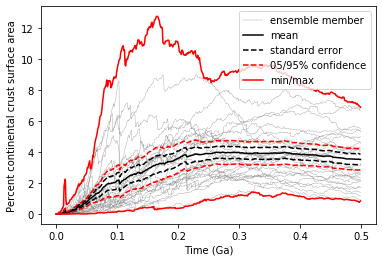

In [98]:
n_layers=1
crust_dict = {}
for ensemble in ensembles:
    for layer in range(n_layers):
        
        percent_bins=[]
        for p in range(58,101):
            if str(p) in list(sio2_dict[ensemble][layer].columns.values):
                percent_bins.append(str(p))
                
        df = sio2_dict[ensemble][layer].loc[:,percent_bins].sum(axis=1)

        if layer == 0:
            crust_dict[ensemble] = df.values
        else:
            crust_dict[ensemble] += df.values
            
    if ensemble == 0:
        plt.plot(df.index.values/1000, df.values, lw=0.3, c='grey', label='ensemble member')
    else:
        plt.plot(df.index.values/1000, df.values, lw=0.3, c='grey')
            
    crust_df = pd.DataFrame(crust_dict, index=df.index.values)
    
    crust_mean = crust_df.mean(axis=1)

crust_df['mean'] = crust_df.mean(axis=1)
crust_df['min'] = crust_df.min(axis=1)
crust_df['max'] = crust_df.max(axis=1)
crust_df['stdev'] = crust_df.std(axis=1)
standard_error = crust_df['stdev']/np.sqrt(len(ensembles))
crust_df['e05'] = crust_df['mean'] - standard_error
crust_df['e95'] = crust_df['mean'] + standard_error
crust_df['c95'] = crust_df['mean'] + standard_error * 1.96
crust_df['c05'] = crust_df['mean'] - standard_error * 1.96

plt.plot(df.index.values/1000, crust_df['mean'], c='k', label='mean')
plt.plot(df.index.values/1000, crust_df['e05'], '--', c='k', label='standard error')
plt.plot(df.index.values/1000, crust_df['e95'], '--', c='k')
plt.plot(df.index.values/1000, crust_df['c05'].clip(lower=0), '--', c='r', label='05/95% confidence')
plt.plot(df.index.values/1000, crust_df['c95'], '--', c='r')
plt.plot(df.index.values/1000, crust_df['min'].clip(lower=0), c='r', label='min/max')
plt.plot(df.index.values/1000, crust_df['max'], c='r')
plt.xlabel("Time (Ga)")
plt.ylabel("Percent continental crust surface area")
#plt.ylim([0,20])
plt.legend()
# plt.savefig('./figs/paper_figs/relative_percent_crust_over_time_bound.pdf', dpi=600)
# plt.savefig('./figs/paper_figs/relative_percent_crust_over_time_bound.png', dpi=600)
plt.show()
plt.close()

In [99]:
sio2_dict[ensemble][layer]

,Unnamed: 0,45,50,52,53,55,57,51,54,58,59,56,60,61,62,63,64,65
0,0,94.679281,5.320719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,1,65.807837,32.360440,1.637144,0.033548,0.147611,0.013419,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,2,65.183843,32.749597,1.650564,0.080515,0.295223,0.013419,0.026838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,3,58.903650,38.654053,1.643854,0.067096,0.644122,0.046967,0.040258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,4,53.837896,34.970478,7.588567,2.509393,0.865539,0.087225,0.093935,0.033548,0.013419,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0.000000,0.402576,18.062265,15.291197,14.257917,1.791465,24.758454,16.545894,1.388889,0.462963,6.736447,0.228127,0.060386,0.013419,0.0,0.0,0.0
496,496,0.000000,0.402576,18.162909,15.210682,14.465915,1.804885,24.537037,16.566023,1.355341,0.462963,6.709608,0.248256,0.060386,0.013419,0.0,0.0,0.0
497,497,0.000000,0.402576,18.162909,15.304616,14.579979,1.751208,24.396135,16.619699,1.348631,0.449544,6.642512,0.268384,0.060386,0.013419,0.0,0.0,0.0
498,498,0.000000,0.402576,18.176329,15.244230,14.398819,1.764627,24.409554,16.686795,1.348631,0.449544,6.803543,0.268384,0.033548,0.013419,0.0,0.0,0.0


In [100]:
final_values = {summary_characteristic:[] for summary_characteristic in ['mean', 'min', 'max',
                                                                         'standard_error', 'CI95']}
for i in range(3,len(ensembles)+1):
    crust_dict = {}
    for ensemble in ensembles[:i]:
        percent_bins=[]
        for p in range(60,100):
            if str(p) in list(sio2_dict[ensemble][0].columns.values):
                percent_bins.append(str(p))
        df = 100* sio2_dict[ensemble][0].loc[:,percent_bins].sum(axis=1) / 40
        crust_dict[ensemble] = df.values
    crust_df = pd.DataFrame(crust_dict, index=df.index.values)
    crust_mean = crust_df.mean(axis=1)
    crust_df['mean'] = crust_df.mean(axis=1)
    crust_df['min'] = crust_df.min(axis=1)
    crust_df['max'] = crust_df.max(axis=1)
    crust_df['stdev'] = crust_df.std(axis=1)
    standard_error = crust_df['stdev']/np.sqrt(len(ensembles))
    crust_df['e05'] = crust_df['mean'] - standard_error
    crust_df['e95'] = crust_df['mean'] + standard_error
    crust_df['c95'] = crust_df['mean'] + standard_error * 1.96
    crust_df['c05'] = crust_df['mean'] - standard_error * 1.96
    final_values['mean'].append(crust_df['mean'][499])
    final_values['min'].append(crust_df['min'][499])
    final_values['max'].append(crust_df['max'][499])
    final_values['standard_error'].append(standard_error[499])
    final_values['CI95'].append(standard_error[499] * 1.96)

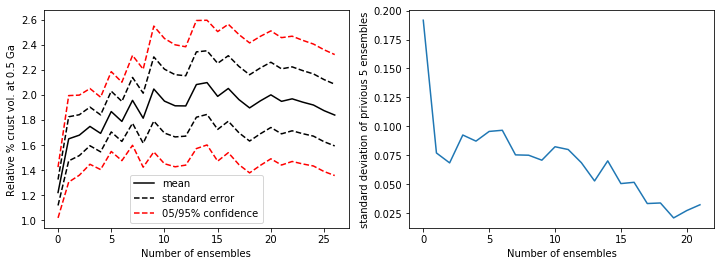

In [101]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1, 2, 1)    
ax.plot(final_values['mean'], c='k', label='mean')
ax.plot(np.array(final_values['mean'])+np.array(final_values['standard_error']), 
         '--', c='k', label='standard error')
ax.plot(np.array(final_values['mean'])-np.array(final_values['standard_error']),'--', c='k', )
ax.plot(np.array(final_values['mean'])+np.array(final_values['CI95']), 
         '--', c='r', label='05/95% confidence')
ax.plot(np.array(final_values['mean'])-np.array(final_values['CI95']),'--', c='r', )
ax.set_xlabel("Number of ensembles")
ax.set_ylabel("Relative % crust vol. at 0.5 Ga")
plt.legend()

std_last_5_ens = []
for i in range(5,len(final_values['mean'])):
    std_last_5_ens.append(np.std(final_values['mean'][i-5:i]))
ax = fig.add_subplot(1, 2, 2)
ax.plot(std_last_5_ens)
ax.set_xlabel("Number of ensembles")
ax.set_ylabel("standard deviation of privious 5 ensembles")
# plt.savefig('./figs/paper_figs/ensemble_convergence_bound.pdf', dpi=600)
# plt.savefig('./figs/paper_figs/ensemble_convergence_bound.png', dpi=600)
plt.show()
plt.close()

In [102]:
total_impact_dict = {}
total_impact_dict['low'] = n_impact_dict[ensemble].low
total_impact_dict['high'] = n_impact_dict[ensemble].high
for ensemble in ensembles:
    total_impact_dict[ensemble] = n_impact_dict[ensemble].total

In [103]:
n_x = n_impact_dict[1]['Unnamed: 0'].values.shape[0]
[int(n_impact_dict[1]['Unnamed: 0'].values[i].split("-")[0]) for i in range(n_x)]

[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300]

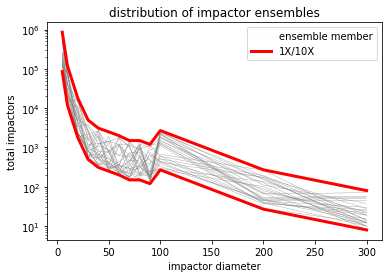

In [104]:
for ensemble in ensembles:
    if ensemble == 0:
        n_x = n_impact_dict[1]['Unnamed: 0'].values.shape[0]
        xvals = [int(n_impact_dict[1]['Unnamed: 0'].values[i].split("-")[0]) for i in range(n_x)]
        plt.plot(xvals,total_impact_dict[ensemble], lw=0.03, label="ensemble member", c='grey')
    else:
        plt.plot(xvals,total_impact_dict[ensemble], lw=0.3, c='grey')
plt.plot(xvals, total_impact_dict['low'], c='r', lw=3, label='1X/10X')
plt.plot(xvals, total_impact_dict['high'], c='r', lw=3)
plt.ylabel('total impactors')
plt.yscale('log')
plt.xlabel("impactor diameter")
plt.title("distribution of impactor ensembles")
plt.legend()
# plt.savefig('./figs/paper_figs/total_impacts_bound.pdf', dpi=600)
# plt.savefig('./figs/paper_figs/total_impacts_bound.png', dpi=600)
plt.show()
plt.close()

In [105]:
max_sio2_list={layer:{} for layer in range(12)}
for layer in range(11):
    for ensemble in ensembles:
        max_sio2_list[layer][ensemble]=[]
        for irow in sio2_dict[ensemble][layer].index.values:
            max_sio2_percent=0
            for icol in sio2_dict[ensemble][layer].columns.values[1:]:
                if sio2_dict[ensemble][layer].loc[irow,icol] > 0:
                    if int(icol) > max_sio2_percent:
                        max_sio2_percent = int(icol)
            max_sio2_list[layer][ensemble].append(max_sio2_percent)

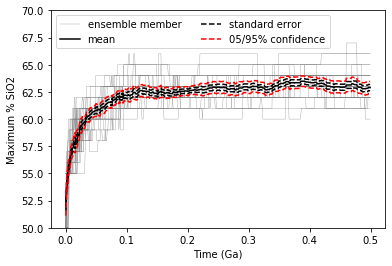

In [106]:
max_sio2_df          = pd.DataFrame(max_sio2_list[0])
max_sio2_df['mean']  = max_sio2_df.mean(axis=1)
max_sio2_df['min']   = max_sio2_df.min(axis=1)
max_sio2_df['max']   = max_sio2_df.max(axis=1)
max_sio2_df['stdev'] = max_sio2_df.std(axis=1)
standard_error       = max_sio2_df['stdev']/np.sqrt(len(ensembles))
max_sio2_df['e05']   = max_sio2_df['mean'] - standard_error
max_sio2_df['e95']   = max_sio2_df['mean'] + standard_error
max_sio2_df['c95']   = max_sio2_df['mean'] + standard_error * 1.96
max_sio2_df['c05']   = max_sio2_df['mean'] - standard_error * 1.96
for ensemble in ensembles:
    if ensemble == 0:
        plt.plot(max_sio2_df.index.values/1000, max_sio2_list[0][ensemble], 
                 lw=0.3, label="ensemble member", c='grey')        
    else:
        plt.plot(max_sio2_df.index.values/1000, max_sio2_list[0][ensemble], lw=0.3, c='grey')

plt.plot(max_sio2_df.index.values/1000, max_sio2_df['mean'], c='k', label='mean')
plt.plot(max_sio2_df.index.values/1000, max_sio2_df['e05'], '--', c='k', label='standard error')
plt.plot(max_sio2_df.index.values/1000, max_sio2_df['e95'], '--', c='k')
plt.plot(max_sio2_df.index.values/1000, max_sio2_df['c05'].clip(lower=0), '--', c='r', label='05/95% confidence')
plt.plot(max_sio2_df.index.values/1000, max_sio2_df['c95'], '--', c='r')
# plt.plot(max_sio2_df.index.values/1000, max_sio2_df['min'].clip(lower=0), c='r', label='min/max')
# plt.plot(max_sio2_df.index.values/1000, max_sio2_df['max'], c='r')
plt.xlabel("Time (Ga)")
plt.ylabel("Maximum % SiO2")
plt.ylim([50,70])
plt.legend(ncol=2)
# plt.savefig('./figs/paper_figs/max_sio2_bound.pdf', dpi=600)
# plt.savefig('./figs/paper_figs/max_sio2_bound.png', dpi=600)
plt.show()
plt.close()

In [107]:
max_sio2_df

,0,1,2,3,4,5,6,7,8,9,...,36,37,mean,min,max,stdev,e05,e95,c95,c05
0,50,50,55,50,50,50,55,55,50,50,...,55,50,52.034483,50.0,56.0,2.506208,51.569092,52.499874,52.946649,51.122316
1,55,54,55,50,55,50,55,55,50,50,...,55,57,53.275862,50.0,57.0,2.504108,52.810861,53.740863,54.187264,52.364460
2,55,55,55,55,55,50,55,55,55,50,...,55,57,54.344828,50.0,57.0,2.187870,53.938550,54.751105,55.141131,53.548524
3,55,55,55,55,55,50,55,55,55,50,...,55,57,54.517241,50.0,58.0,2.367406,54.077625,54.956858,55.378889,53.655593
4,55,55,55,55,56,50,55,55,55,50,...,60,58,55.206897,50.0,60.0,2.361239,54.768426,55.645368,56.066300,54.347493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,63,62,62,62,63,64,62,64,62,65,...,62,62,62.827586,60.0,66.0,1.588199,62.532665,63.122507,63.405632,62.249541
496,63,62,62,62,63,64,62,64,62,65,...,62,62,62.896552,60.0,66.0,1.552415,62.608276,63.184828,63.461573,62.331530
497,63,62,62,62,63,64,62,64,62,65,...,62,62,62.896552,60.0,66.0,1.552415,62.608276,63.184828,63.461573,62.331530
498,63,62,62,62,63,64,62,64,62,65,...,62,62,62.896552,60.0,66.0,1.552415,62.608276,63.184828,63.461573,62.331530


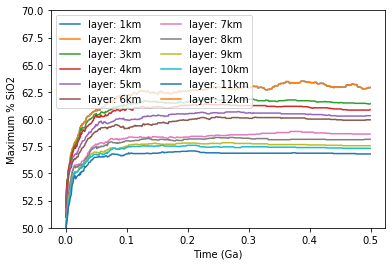

In [108]:
# llyr = {0:"1-2km",1:"3-4km",2:"5-6km",3:"7-8km",4:"9-10km",5:"11-12km",
#         6:"13-14km",7:"15-16km",8:"17-18km",9:"19-20km",10:"21-22km",11:"23-24km"}
llyr = {i:f"{i+1}km" for i in range(12)}
for layer in range(12):
    max_sio2_df          = pd.DataFrame(max_sio2_list[layer])
    max_sio2_df['mean']  = max_sio2_df.mean(axis=1)
    plt.plot(max_sio2_df.index.values/1000, max_sio2_df['mean'], label=f'layer: {llyr[layer]}')
plt.xlabel("Time (Ga)")
plt.ylabel("Maximum % SiO2")
plt.ylim([50,70])
plt.legend(ncol=2)
# plt.savefig('./figs/paper_figs/max_sio2_bound.pdf', dpi=600)
# plt.savefig('./figs/paper_figs/max_sio2_bound.png', dpi=600)
plt.show()
plt.close()

In [130]:
relative_percent_crust_vol = {}

for ensemble in ensembles:
    
    tot_dir = f"sio2_percent_tables/march2022_5/total_relative_crust_{ensemble}.txt"
    with open(tot_dir, "r") as f:
        data = f.read().splitlines()
        
    relative_percent_crust_vol[ensemble] = [np.float(i) for i in data]
    
#     plt.plot(relative_percent_crust_vol)
#     plt.xlabel("Time (Ga)")
#     plt.ylabel("Relative % continental crust volume")
    
# plt.show()
# plt.close()

In [134]:
crust_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,30,31,32,33,34,35,36,37
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000019,0.000038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.006552,0.004802,0.010795,0.014722,0.011789,0.017834,0.006235,0.019608,0.005885,0.011278,...,0.002134,0.004026,0.011264,0.012021,0.003240,0.024079,0.007957,0.008435,0.006727,0.006481
496,0.006533,0.005005,0.010947,0.014741,0.011670,0.017853,0.006230,0.019637,0.005932,0.011226,...,0.002110,0.004073,0.011368,0.012167,0.003193,0.024022,0.007957,0.008444,0.006751,0.006453
497,0.006315,0.004958,0.011013,0.014741,0.011581,0.017778,0.006259,0.019457,0.005866,0.011396,...,0.002096,0.003950,0.011387,0.012158,0.003179,0.023852,0.007957,0.008406,0.006760,0.006424
498,0.006306,0.004844,0.011041,0.014655,0.011581,0.017645,0.006164,0.019216,0.005838,0.011353,...,0.002105,0.003884,0.011552,0.012177,0.003132,0.023833,0.007966,0.008406,0.006855,0.006382


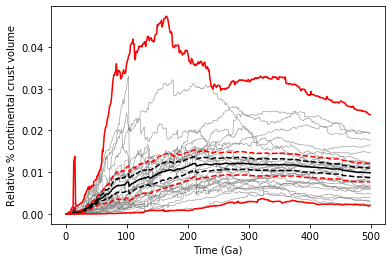

In [137]:
crust_df = pd.DataFrame(relative_percent_crust_vol)
for ensemble in ensembles:
    plt.plot(np.array(relative_percent_crust_vol[ensemble]), c="grey", lw=0.5)
    plt.xlabel("Time (Ga)")
    plt.ylabel("Relative % continental crust volume")
    
crust_df['mean'] = crust_df.mean(axis=1)
crust_df['min'] = crust_df.min(axis=1)
crust_df['max'] = crust_df.max(axis=1)
crust_df['stdev'] = crust_df.std(axis=1)
standard_error = crust_df['stdev']/np.sqrt(len(ensembles))
crust_df['e05'] = crust_df['mean'] - standard_error
crust_df['e95'] = crust_df['mean'] + standard_error
crust_df['c95'] = crust_df['mean'] + standard_error * 1.96
crust_df['c05'] = crust_df['mean'] - standard_error * 1.96

plt.plot(crust_df['mean'], c='k', label='mean')
plt.plot(crust_df['e05'], '--', c='k', label='standard error')
plt.plot(crust_df['e95'], '--', c='k')
plt.plot(crust_df['c05'].clip(lower=0), '--', c='r', label='05/95% confidence')
plt.plot(crust_df['c95'], '--', c='r')
plt.plot(crust_df['min'].clip(lower=0), c='r', label='min/max')
plt.plot(crust_df['max'], c='r')
plt.xlabel("Time (Ga)")
plt.ylabel("Relative % continental crust volume")
    
    
plt.show()
plt.close()